<a href="https://colab.research.google.com/github/6kitty/IP01069/blob/main/IP01069_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 데이터 준비
!git clone https://github.com/Ankit152/Fish-Market.git

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

data = pd.read_csv("/content/Fish-Market/Fish.csv")

perch_data = data[data['Species'] == 'Perch']


perch_length = perch_data['Length2'].values.tolist()
perch_weight = perch_data['Weight'].values.tolist()

print(perch_length)
print(perch_weight)

fatal: destination path 'Fish-Market' already exists and is not an empty directory.
[8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
[5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0]


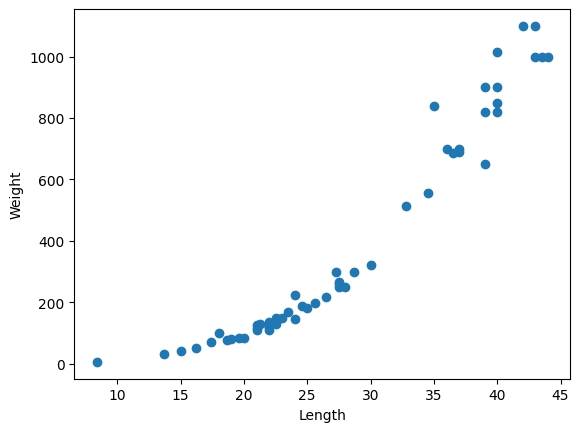

In [3]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [7]:
# 훈련세트와 테스트세트로 분리

from sklearn.model_selection import train_test_split
import numpy as np

perch_length_np = np.array(perch_length)
perch_weight_np = np.array(perch_weight)

train_input,test_input,train_target,test_target=train_test_split(perch_length_np,perch_weight_np,random_state=42)

train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

print(train_input.shape,test_input.shape)
print(train_input)

(42, 1) (14, 1)
[[19.6]
 [22. ]
 [18.7]
 [17.4]
 [36. ]
 [25. ]
 [40. ]
 [39. ]
 [43. ]
 [22. ]
 [20. ]
 [22. ]
 [24. ]
 [27.5]
 [43. ]
 [40. ]
 [24. ]
 [21. ]
 [27.5]
 [40. ]
 [32.8]
 [26.5]
 [36.5]
 [13.7]
 [22.7]
 [15. ]
 [37. ]
 [35. ]
 [28.7]
 [23.5]
 [39. ]
 [21. ]
 [23. ]
 [22. ]
 [44. ]
 [22.5]
 [19. ]
 [37. ]
 [22. ]
 [25.6]
 [42. ]
 [34.5]]


In [8]:
# 결정계수
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input,train_target)
knr.score(test_input,test_target)

0.992809406101064

In [9]:
# 테스트 세트에 대한 오차 계산
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target,test_prediction)
print(mae)

19.157142857142862


In [10]:
# 훈련세트와 테스트세트의 score() 점수 차이 발생
print(knr.score(test_input,test_target))
print(knr.score(train_input,train_target))

0.992809406101064
0.9698823289099254


In [11]:
# 과소적합 해소 : 모델을 복잡하게 변경
knr.n_neighbors=3
knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))
print(knr.score(test_input,test_target))

0.9804899950518966
0.9746459963987609


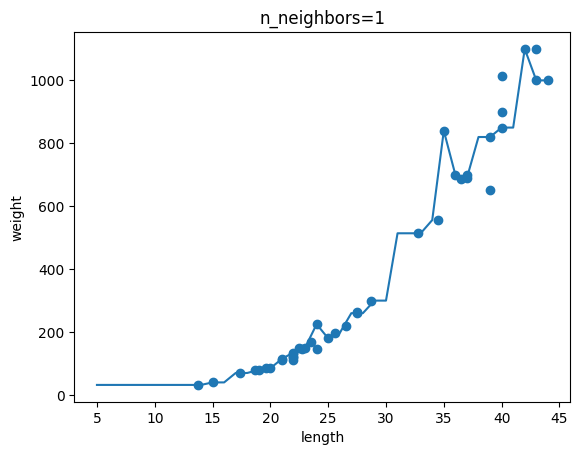

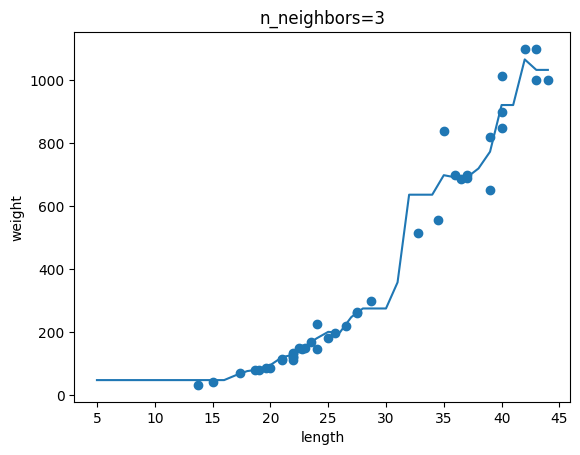

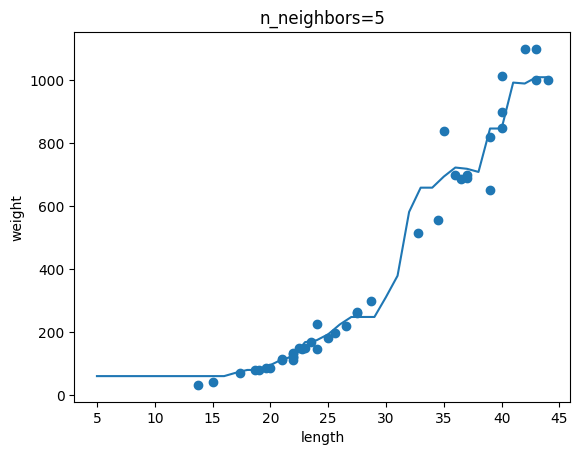

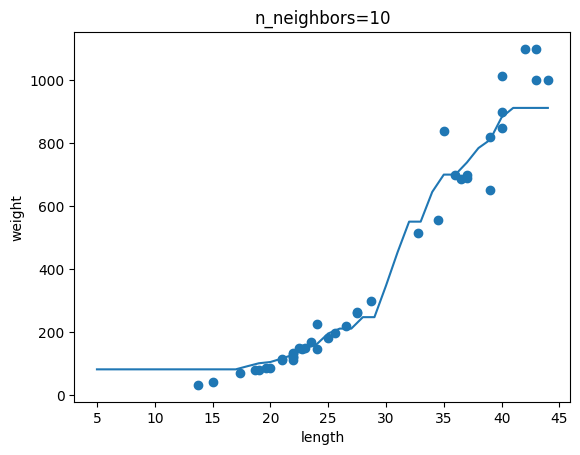

In [13]:
# 확인 문제
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

knr = KNeighborsRegressor()

x = np.arange(5, 45).reshape(-1, 1)

for n in [1, 3, 5, 10]:
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors={}'.format(n))
  plt.xlabel('length')
  plt.ylabel('weight')
  plt.show()

In [14]:
# 선형회귀
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_input,train_target)
print(lr.predict([[50]]))


[1241.83860323]


In [15]:
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


In [16]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


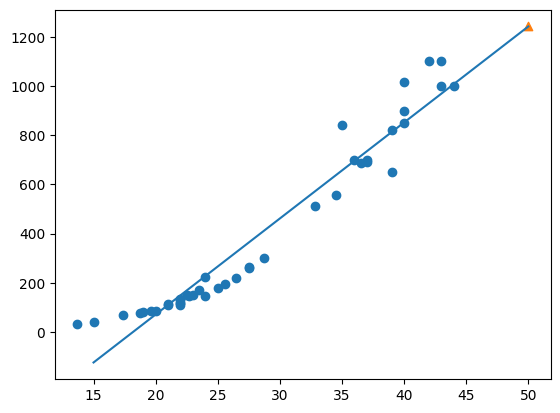

In [17]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.8,marker='^')
plt.show()

In [19]:
# 다항 회귀
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))
lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.predict([[50**2,50]]))
print(lr.coef_,lr.intercept_)


[1573.98423528]
[  1.01433211 -21.55792498] 116.0502107827827


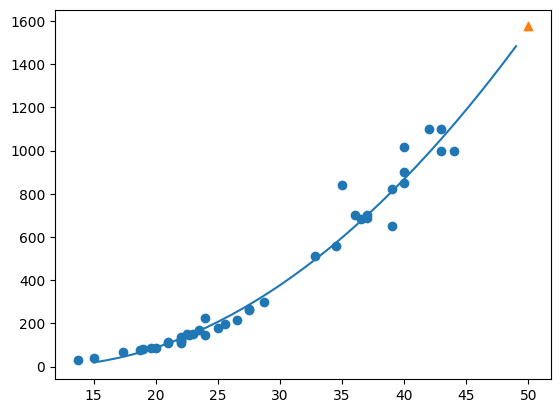

In [20]:
# 결과출력 및 결정계수 출력
point=np.arange(15,50)
plt.scatter(train_input,train_target)
plt.plot(point,1.01*point**2-21.6*point+116.05)
plt.scatter([50],[1574],marker='^')
plt.show()

In [21]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


1040.0


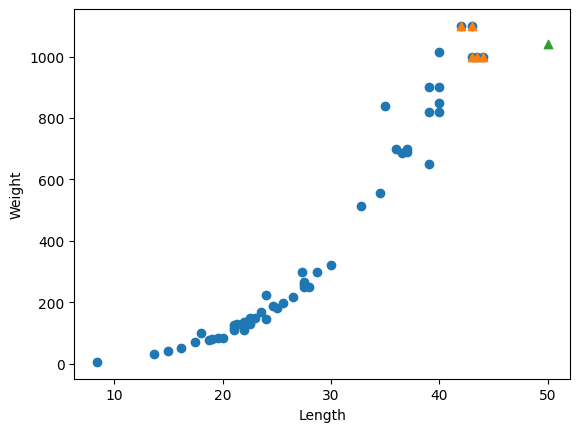

[1198.84124015]


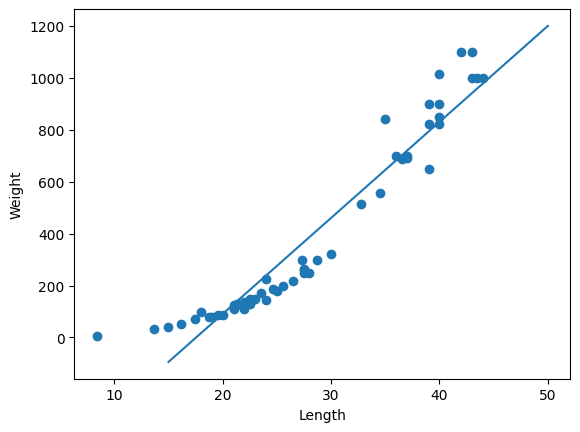

[1563.07196794]


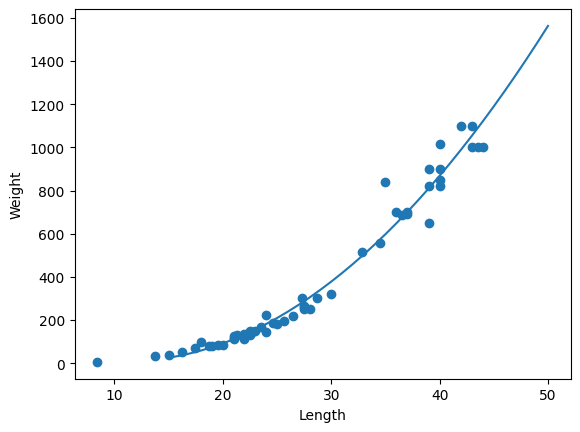

In [70]:
# 응용예제
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
)
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
)

train_input = perch_length.reshape(-1, 1)
train_target = perch_weight

knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(train_input, train_target)

distances, indexes = knr.kneighbors([[50]])

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='^')
plt.scatter(50, knr.predict([[50]]), marker='^')
plt.xlabel('Length')
plt.ylabel('Weight')

print(np.mean(train_target[indexes]))
plt.show()

lr = LinearRegression()
lr.fit(train_input, train_target)

plt.scatter(train_input, train_target)
plt.plot([15, 50], [lr.predict([[15]]), lr.predict([[50]])])
plt.xlabel('Length')
plt.ylabel('Weight')

print(lr.predict([[50]]))
plt.show()

train_poly = np.column_stack((train_input ** 2, train_input))

lr_poly = LinearRegression()
lr_poly.fit(train_poly, train_target)

plt.scatter(train_input, train_target)
point = np.arange(15, 51)
plt.plot(point, lr_poly.coef_[0] * point**2 + lr_poly.coef_[1] * point + lr_poly.intercept_)
plt.xlabel('Length')
plt.ylabel('Weight')


print(lr_poly.predict([[50**2, 50]]))

plt.show()

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd

df_perch_full = pd.read_csv('perch_full_data.csv')

perch_full = df_perch_full.to_numpy()
X = perch_full[:, :-1]
y = perch_full[:, -1]

train_input, test_input, train_target, test_target = train_test_split(X, y, random_state=42)

In [44]:
perch_full_df = data[data['Species'] == 'Perch'][['Length2', 'Height', 'Weight']]

perch_full_df.to_csv('perch_full_data.csv', index=False)

print("Created 'perch_full_data.csv' with 'Length2', 'Height', and 'Weight' columns for Perch.")

Created 'perch_full_data.csv' with 'Length2', 'Height', and 'Weight' columns for Perch.


In [45]:
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [46]:
poly=PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly=poly.transform(train_input)

In [47]:
print(train_poly.shape)

(42, 5)


In [48]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [49]:
test_poly=poly.transform(test_input)
print(train_poly.shape)

(42, 5)


In [50]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9879646360231498


In [51]:
print(lr.score(test_poly,test_target))

0.9821479684915221


In [52]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)

In [53]:
print(train_poly.shape)

(42, 5)


In [54]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))

0.9879646360231498


In [56]:
print(lr.score(test_poly,test_target))

0.9821479684915221


In [57]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)
print(train_poly.shape)
print(test_poly.shape)

(42, 5)
(14, 5)


In [58]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9818385526746933
0.9719904001272096


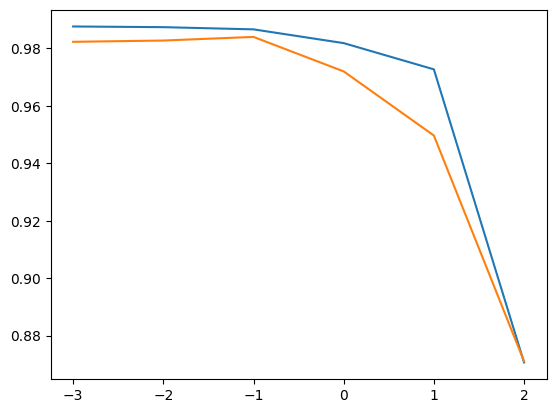

In [59]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]

alpha_list=[0.001,0.01,0.1,1,10,100]
for alpha in alpha_list:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list),test_score)
plt.show()

In [60]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,train_target)
print(lasso.score(train_scaled,train_target))
print(lasso.score(test_scaled,test_target))

0.9847238550506091
0.9792674836691675


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.367e+02, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.232e+03, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


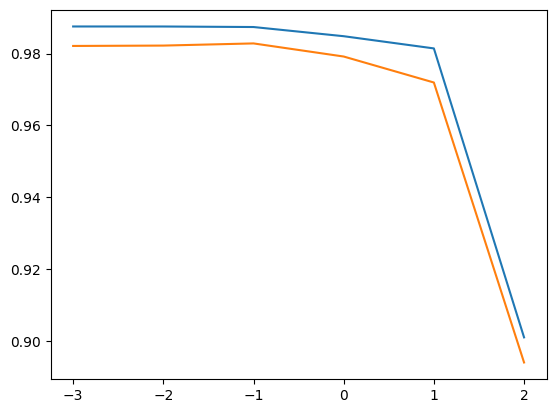

In [61]:
train_score=[]
test_score=[]

for alpha in alpha_list:
  lasso = Lasso(alpha=alpha, max_iter=10000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()